In [1]:
import tensorflow as tf 
from tensorflow import keras 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import random 

print(tf.__version__)


2023-05-15 09:27:51.824954: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-15 09:27:51.875442: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-15 09:27:51.876686: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-15 09:27:52.882832: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.12.0


In [2]:
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train/255.0
x_test = x_test /255.0

In [4]:
x_train = np.expand_dims(x_train, axis=3) 
x_test = np.expand_dims(x_test, axis=3) 

In [5]:
def create_model(): 
    model = keras.Sequential([
        keras.layers.InputLayer(input_shape=(28,28,1)),
        # tích chập 
        keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation=tf.nn.relu),
        keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation=tf.nn.relu),
        # giảm số chiều để tăng tốc độ tính toán 
        keras.layers.MaxPooling2D(pool_size=(2,2)),
        keras.layers.Dropout(0.25),
        keras.layers.Flatten(),
        keras.layers.Dense(10,activation=tf.nn.softmax)
    ]) 

    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'] )
    
    return model 

In [6]:
base_model = create_model()
# Huấn luyện mô hình đào tạo
base_model.fit(
    x_train,
    y_train,
    # só lượng vòng lặp muốn huấn luyện mô hình 
    epochs=5,
    validation_data=(x_test,y_test)
    ) 

Epoch 1/5


2023-05-15 09:28:11.855460: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


   3/1875 [..............................] - ETA: 1:30 - loss: 2.2673 - accuracy: 0.1875 

2023-05-15 09:28:12.847078: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23887872 exceeds 10% of free system memory.
2023-05-15 09:28:12.847144: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23887872 exceeds 10% of free system memory.
2023-05-15 09:28:12.899859: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23887872 exceeds 10% of free system memory.
2023-05-15 09:28:12.899934: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23887872 exceeds 10% of free system memory.


1875/1875 [==============================] - 94s 50ms/step - loss: 0.1401 - accuracy: 0.9580 - val_loss: 0.0558 - val_accuracy: 0.9817
Epoch 2/5
1875/1875 [==============================] - 85s 45ms/step - loss: 0.0548 - accuracy: 0.9835 - val_loss: 0.0434 - val_accuracy: 0.9859
Epoch 3/5
 132/1875 [=>............................] - ETA: 1:11 - loss: 0.0357 - accuracy: 0.9908

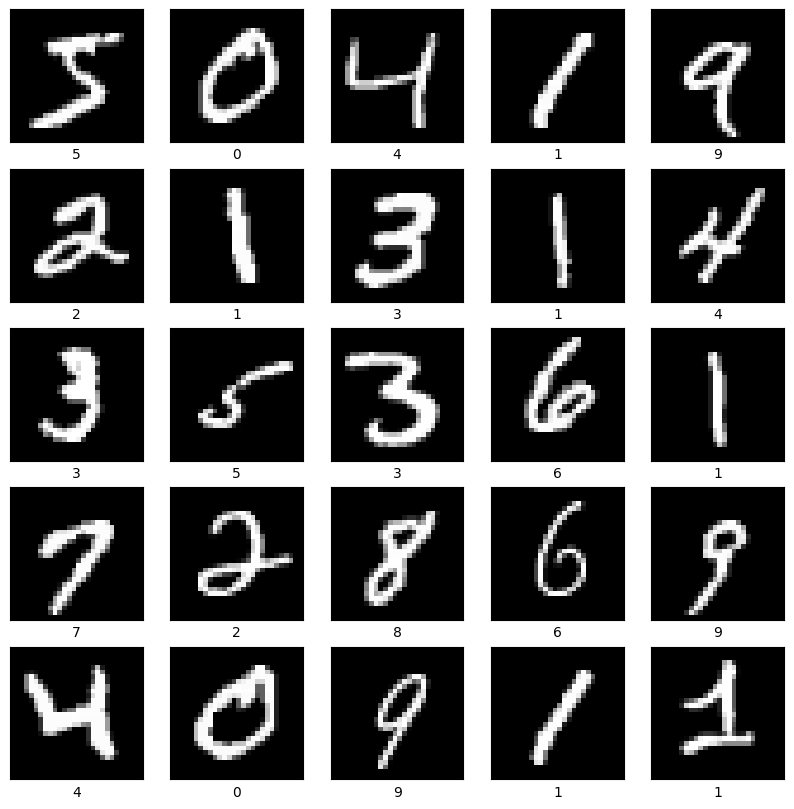

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(x_train[i], axis=2), cmap=plt.cm.gray)
    plt.xlabel(y_train[i])

plt.show()

In [10]:
print(y_train)
print(len(y_train))

[5 0 4 ... 5 6 8]
60000


In [11]:
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=0.25,
    zoom_range=0.2
)

train_generator = datagen.flow(x_train, y_train)
test_generator=datagen.flow(x_test, y_test)

In [12]:
base_model.evaluate(test_generator)


  5/313 [..............................] - ETA: 4s - loss: 5.1779 - accuracy: 0.3500 

2023-05-15 06:44:27.081446: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


313/313 [==============================] - 4s 13ms/step - loss: 5.4786 - accuracy: 0.3260


[5.478577136993408, 0.32600000500679016]

In [13]:
improved_model = create_model()
improved_model.fit(train_generator,epochs=5, validation_data=test_generator)

Epoch 1/5


2023-05-15 06:45:42.355970: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1875/1875 [==============================] - ETA: 0s - loss: 0.9766 - accuracy: 0.6851

2023-05-15 06:47:16.744005: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1875/1875 [==============================] - 99s 52ms/step - loss: 0.9766 - accuracy: 0.6851 - val_loss: 0.4815 - val_accuracy: 0.8620
Epoch 2/5
1875/1875 [==============================] - 85s 45ms/step - loss: 0.4845 - accuracy: 0.8532 - val_loss: 0.3615 - val_accuracy: 0.8990
Epoch 3/5
1875/1875 [==============================] - 90s 48ms/step - loss: 0.3921 - accuracy: 0.8831 - val_loss: 0.3028 - val_accuracy: 0.9096
Epoch 4/5
1875/1875 [==============================] - 96s 51ms/step - loss: 0.3389 - accuracy: 0.8973 - val_loss: 0.2646 - val_accuracy: 0.9200
Epoch 5/5
1875/1875 [==============================] - 76s 40ms/step - loss: 0.3141 - accuracy: 0.9070 - val_loss: 0.2470 - val_accuracy: 0.9268


In [14]:
improved_model.save('mnist.h5')